<a href="https://colab.research.google.com/github/Shashwot90/CV/blob/main/02_neural_network_classification_with_tensorflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Introduction to neural network classification with TensorFlow

write neural networks for classification
* Binary classification
* Multiclass classification
* Multilabel classification

###CReating data to view and fit

In [ ]:
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [ ]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X0": X[:, 0], "X1": X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


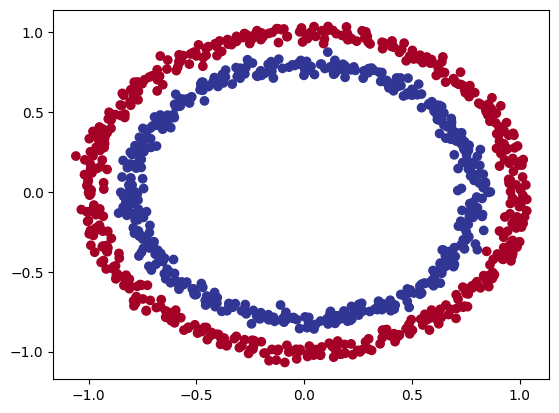

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

###Input and output shapes

In [ ]:
X.shape, y.shape


((1000, 2), (1000,))

In [ ]:
len(X), len(y)

(1000, 1000)

In [ ]:
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

###Steps in modelling

1. create model
2. compile
3. fit
4. evaluate
5. tweak
6. evaluate

In [ ]:
import tensorflow as tf
print(tf.__version__)

import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

2.14.0
Notebook last run (end-to-end): 2023-10-27 02:13:49.324377


In [ ]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 5.0134 - accuracy: 0.4800
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 6.0149 - accuracy: 0.5300
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 5.3911 - accuracy: 0.5780
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 5.2302 - accuracy: 0.5390
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 5.2462 - accuracy: 0.5460


In [ ]:
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

model_2.fit(X, y, epochs=100, verbose=0)

In [ ]:
model_2.evaluate(X, y)

32/32 [==============================] - 1s 6ms/step - loss: 0.6936 - accuracy: 0.5000


[0.6936452984809875, 0.5]

###Improve Model

In [ ]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_3.fit(X, y, epochs=100, verbose=0)

In [ ]:
model_3.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6974 - accuracy: 0.5080


[0.6973522901535034, 0.5080000162124634]

In [ ]:
import numpy as np

In [ ]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())


313/313 [==============================] - 1s 3ms/step
doing binary classifcation...


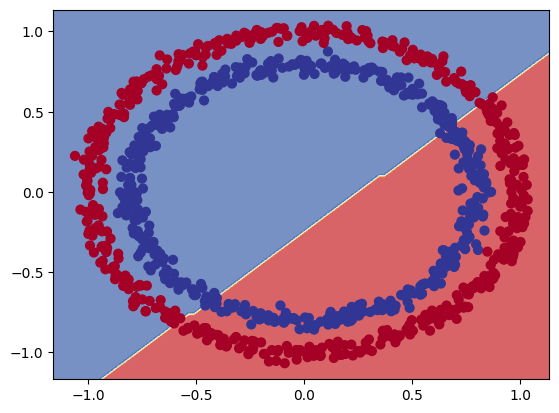

In [ ]:
plot_decision_boundary(model_3, X, y)

In [ ]:
tf.random.set_seed(42)

X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5)

X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

#model_3.fit(X_reg_train, y_reg_train, epochs=100)

In [ ]:

# Setup random seed
tf.random.set_seed(42)

# Recreate the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Change the loss and metrics of our compiled model
model_3.compile(loss=tf.keras.losses.mae, # change the loss function to be regression-specific
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae']) # change the metric to be regression-specific

# Fit the recompiled model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1),
            y_reg_train,
            epochs=100)

Epoch 1/100
5/5 [==============================] - 2s 11ms/step - loss: 482.2782 - mae: 482.2782
Epoch 2/100
5/5 [==============================] - 0s 5ms/step - loss: 346.6726 - mae: 346.6726
Epoch 3/100
5/5 [==============================] - 0s 5ms/step - loss: 217.0640 - mae: 217.0640
Epoch 4/100
5/5 [==============================] - 0s 5ms/step - loss: 83.5325 - mae: 83.5325
Epoch 5/100
5/5 [==============================] - 0s 5ms/step - loss: 73.4387 - mae: 73.4387
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 100.0273 - mae: 100.0273
Epoch 7/100
5/5 [==============================] - 0s 5ms/step - loss: 69.1013 - mae: 69.1013
Epoch 8/100
5/5 [==============================] - 0s 5ms/step - loss: 45.2755 - mae: 45.2755
Epoch 9/100
5/5 [==============================] - 0s 5ms/step - loss: 48.7405 - mae: 48.7405
Epoch 10/100
5/5 [==============================] - 0s 5ms/step - loss: 42.6995 - mae: 42.6995
Epoch 11/100
5/5 [==============================] 

2/2 [==============================] - 0s 5ms/step


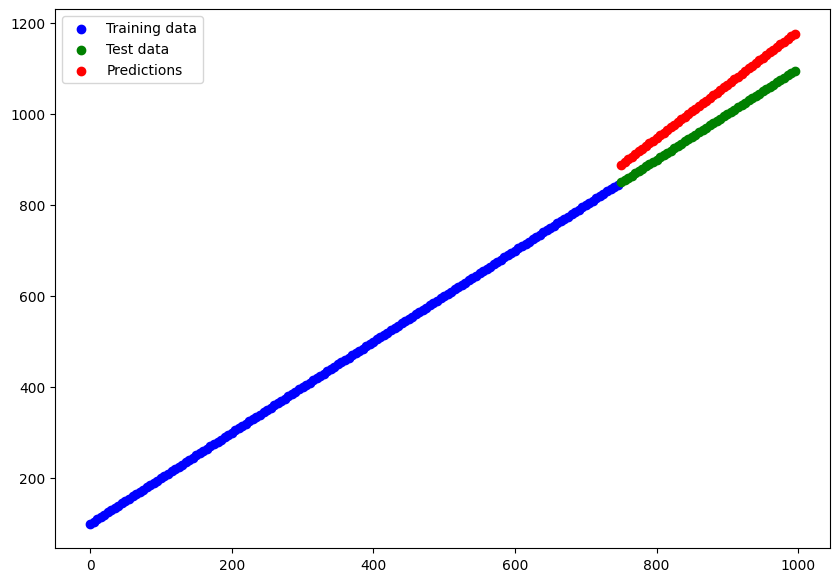

In [ ]:
y_reg_preds = model_3.predict(X_reg_test)

plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend();

In [ ]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 6.1675 - accuracy: 0.4860
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 6.1644 - accuracy: 0.4880
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 6.1530 - accuracy: 0.4860
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 6.1503 - accuracy: 0.4860
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 6.1489 - accuracy: 0.4870
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 6.1473 - accuracy: 0.4870
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 6.1457 - accuracy: 0.4870
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 6.1257 - accuracy: 0.4880
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 6.1196 - accuracy: 0.4870
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 6.1093 - accuracy: 0.4870
Epoch 11/

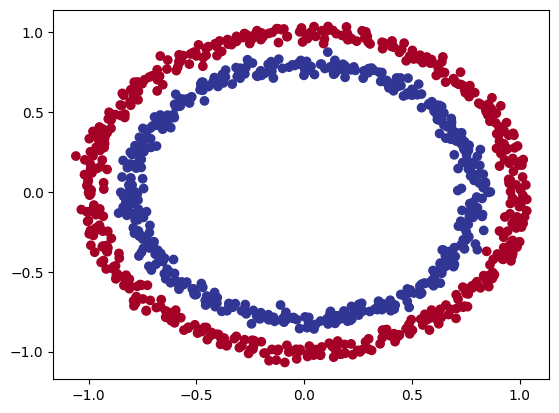

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


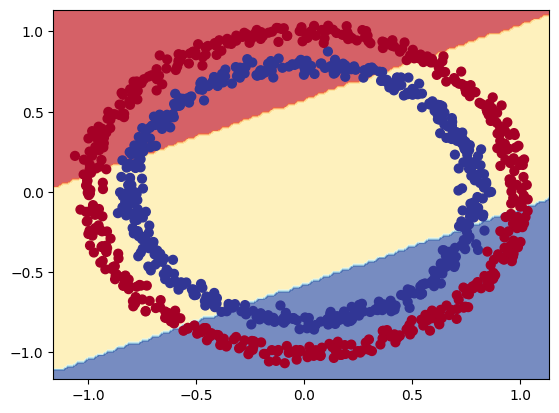

In [ ]:
plot_decision_boundary(model_4, X, y)

###Non-linear activation function

In [ ]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 6.3293 - accuracy: 0.4830
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 6.2824 - accuracy: 0.4830
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 6.2727 - accuracy: 0.4830
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 6.2715 - accuracy: 0.4830
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 6.2703 - accuracy: 0.4830
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 6.2687 - accuracy: 0.4830
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 6.2675 - accuracy: 0.4830
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 6.2664 - accuracy: 0.4830
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 6.2654 - accuracy: 0.4830
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 6.2646 - accuracy: 0.4820
Epoch 11/

In [ ]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu)
])

model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

history = model_6.fit(X, y, epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 2ms/step - loss: 4.2996 - accuracy: 0.0160
Epoch 2/250
32/32 [==============================] - 0s 2ms/step - loss: 3.9892 - accuracy: 0.0250
Epoch 3/250
32/32 [==============================] - 0s 2ms/step - loss: 3.8622 - accuracy: 0.0790
Epoch 4/250
32/32 [==============================] - 0s 2ms/step - loss: 3.7842 - accuracy: 0.0880
Epoch 5/250
32/32 [==============================] - 0s 2ms/step - loss: 3.7158 - accuracy: 0.1030
Epoch 6/250
32/32 [==============================] - 0s 2ms/step - loss: 3.6401 - accuracy: 0.1390
Epoch 7/250
32/32 [==============================] - 0s 2ms/step - loss: 3.5476 - accuracy: 0.1780
Epoch 8/250
32/32 [==============================] - 0s 2ms/step - loss: 3.4583 - accuracy: 0.1870
Epoch 9/250
32/32 [==============================] - 0s 2ms/step - loss: 3.3831 - accuracy: 0.1870
Epoch 10/250
32/32 [==============================] - 0s 2ms/step - loss: 3.3233 - accuracy: 0.1910
Epoch 11/

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, ReLU activation
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) # ouput layer, sigmoid activation
])

# Compile the model
model_7.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history = model_7.fit(X, y, epochs=200, verbose=0)

In [ ]:
model_7.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.1297 - accuracy: 0.9780


[0.12970282137393951, 0.9779999852180481]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


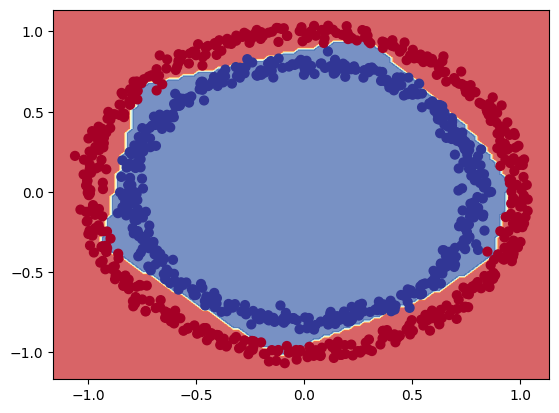

In [ ]:
plot_decision_boundary(model_7, X, y)

In [ ]:
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

In [ ]:
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

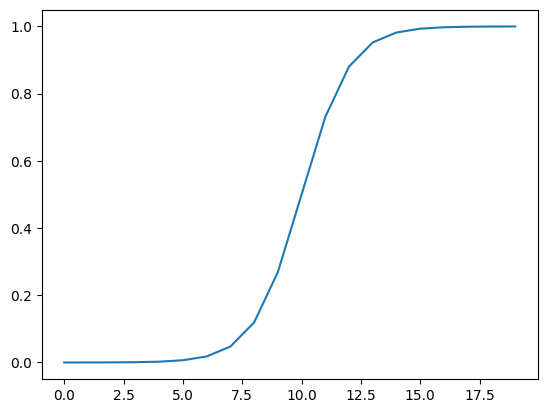

In [ ]:
plt.plot(sigmoid(A))

In [ ]:
def relu(x):
  return tf.maximum(0, x)

relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

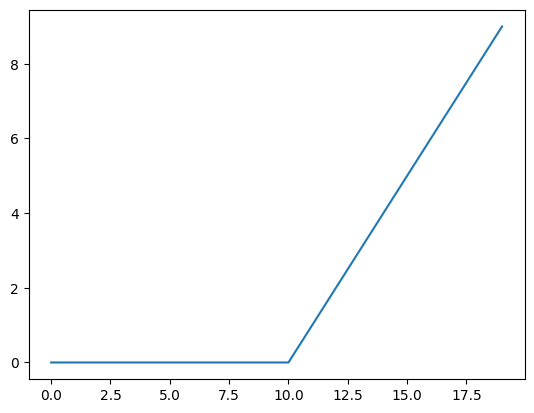

In [ ]:
plt.plot(relu(A))

In [ ]:
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

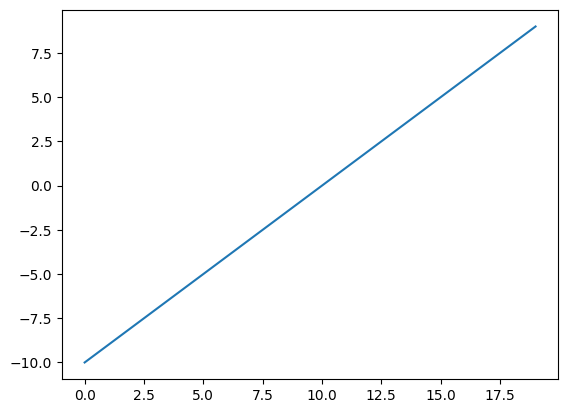

In [ ]:
plt.plot(tf.keras.activations.linear(A))

###Evaluating and improving classification

In [ ]:
X_train, y_train = X[:800],y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model (same as model_7)
model_8 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"), # hidden layer 1, using "relu" for activation (same as tf.keras.activations.relu)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid") # output layer, using 'sigmoid' for the output
])

# Compile the model
model_8.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), # increase learning rate from 0.001 to 0.01 for faster learning
                metrics=['accuracy'])

# Fit the model
history = model_8.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 2ms/step - loss: 0.6953 - accuracy: 0.4475
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6919 - accuracy: 0.4888
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6890 - accuracy: 0.5163
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6843 - accuracy: 0.5150
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6733 - accuracy: 0.5688
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6401 - accuracy: 0.6725
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6023 - accuracy: 0.7025
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5537 - accuracy: 0.7650
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.4979 - accuracy: 0.7975
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.4397 - accuracy: 0.8462
Epoch 11/25
25/25 [

In [ ]:
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1046 - accuracy: 0.9950


[0.10463103652000427, 0.9950000047683716]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


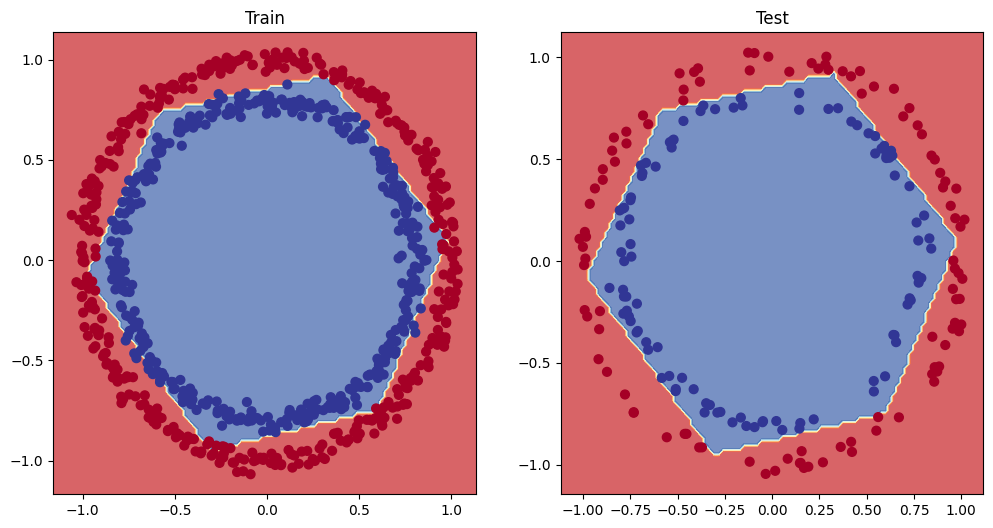

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X_test, y_test)
plt.show();

###PLot the loss(or training) curves

In [ ]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.695337,0.44750
1,0.691934,0.48875
2,0.689044,0.51625
3,0.684342,0.51500
4,0.673280,0.56875
5,0.640104,0.67250
6,0.602316,0.70250
7,0.553694,0.76500
8,0.497940,0.79750
9,0.439684,0.84625


Text(0.5, 1.0, 'Model_8 loss curves')

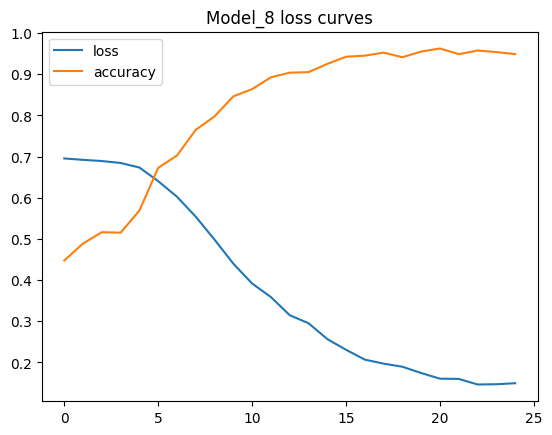

In [ ]:
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves")


###Finding best learning rate

to find ideal learning rate where loss decreases the most during training

* learning rate callback - extra piece of functionality
* modified loss curve

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_8)
model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_9.compile(loss="binary_crossentropy", # we can use strings here too
              optimizer="Adam", # same as tf.keras.optimizers.Adam() with default settings
              metrics=["accuracy"])

# Create a learning rate scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch

# Fit the model (passing the lr_scheduler callback)
history_9 = model_9.fit(X_train,
                      y_train,
                      epochs=100,
                      callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.7165 - accuracy: 0.4963 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 14ms/step - loss: 0.7155 - accuracy: 0.4925 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7144 - accuracy: 0.4913 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7133 - accuracy: 0.4900 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7121 - accuracy: 0.4888 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7109 - accuracy: 0.4913 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7095 - accuracy: 0.4913 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7083 - accuracy: 0.4888 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss

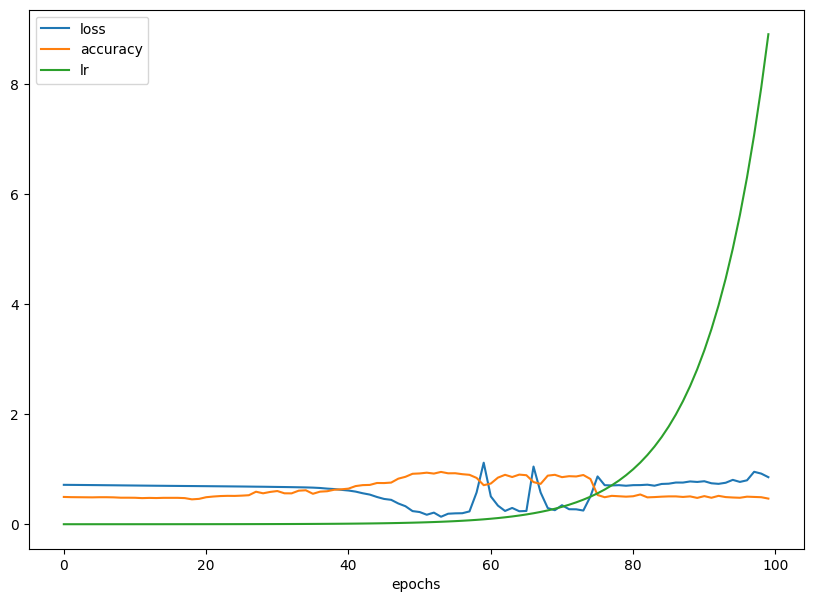

In [ ]:
pd.DataFrame(history_9.history).plot(figsize=(10, 7), xlabel="epochs");

Text(0.5, 1.0, 'Learning rate vs. Loss')

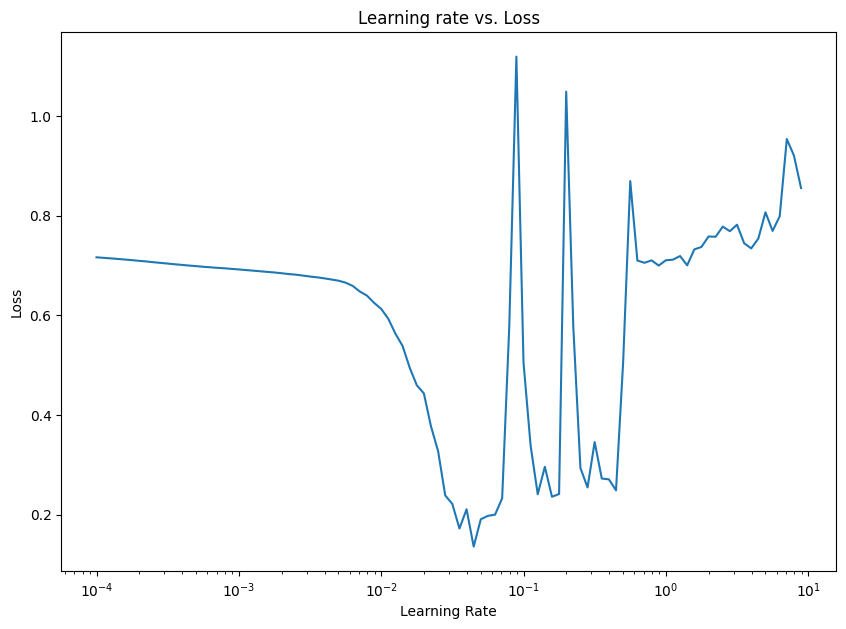

In [ ]:
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. Loss")

In [ ]:
len(lrs)

100

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model with the ideal learning rate
model_10.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.02), # to adjust the learning rate, you need to use tf.keras.optimizers.Adam (not "adam")
                metrics=["accuracy"])

# Fit the model for 20 epochs (5 less than before)
history_10 = model_10.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 2ms/step - loss: 0.6927 - accuracy: 0.5238
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6765 - accuracy: 0.6025
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6559 - accuracy: 0.6062
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6197 - accuracy: 0.6988
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5677 - accuracy: 0.7600
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4934 - accuracy: 0.8012
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4387 - accuracy: 0.8300
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3712 - accuracy: 0.8938
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3031 - accuracy: 0.9350
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.2320 - accuracy: 0.9775
Epoch 11/20
25/25 [

In [ ]:
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0834 - accuracy: 0.9750


[0.08336609601974487, 0.9750000238418579]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


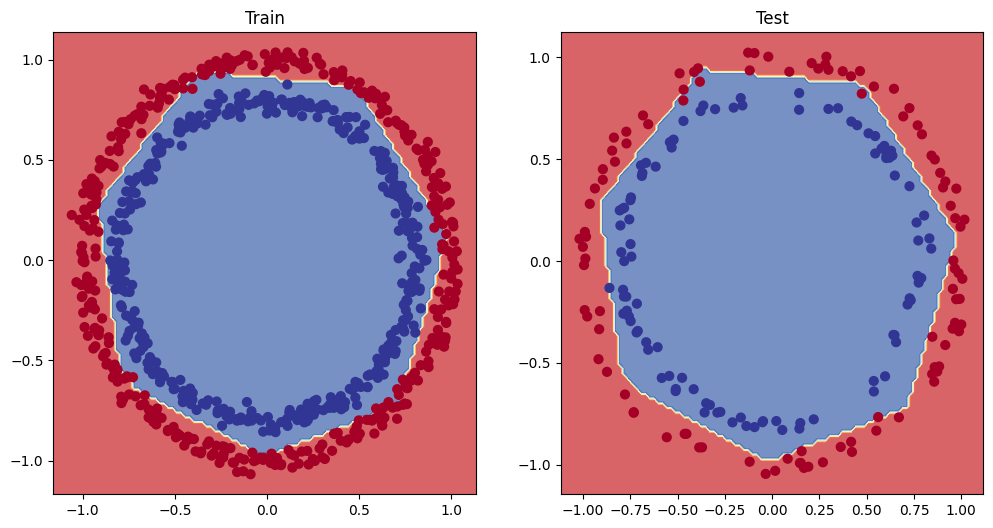

In [ ]:

# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y=y_test)
plt.show()

from tensorflow.python.ops.gen_nn_ops import softmax_cross_entropy_with_logits_eager_fallback
###More classification evaluation methods

* Accuracy
* Precision
* Recall
* F-1 score
* Confusion matrix
* classification report scikit-learn

In [ ]:
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 4ms/step - loss: 0.0834 - accuracy: 0.9750
Model loss on the test set: 0.08336609601974487
Model accuracy on the test set: 97.50%


In [ ]:
from sklearn.metrics import confusion_matrix

y_preds = model_10.predict(X_test)

confusion_matrix(y_test, tf.round(y_preds))

7/7 [==============================] - 0s 3ms/step


array([[97,  4],
       [ 1, 98]])

Pretify confusion matrix

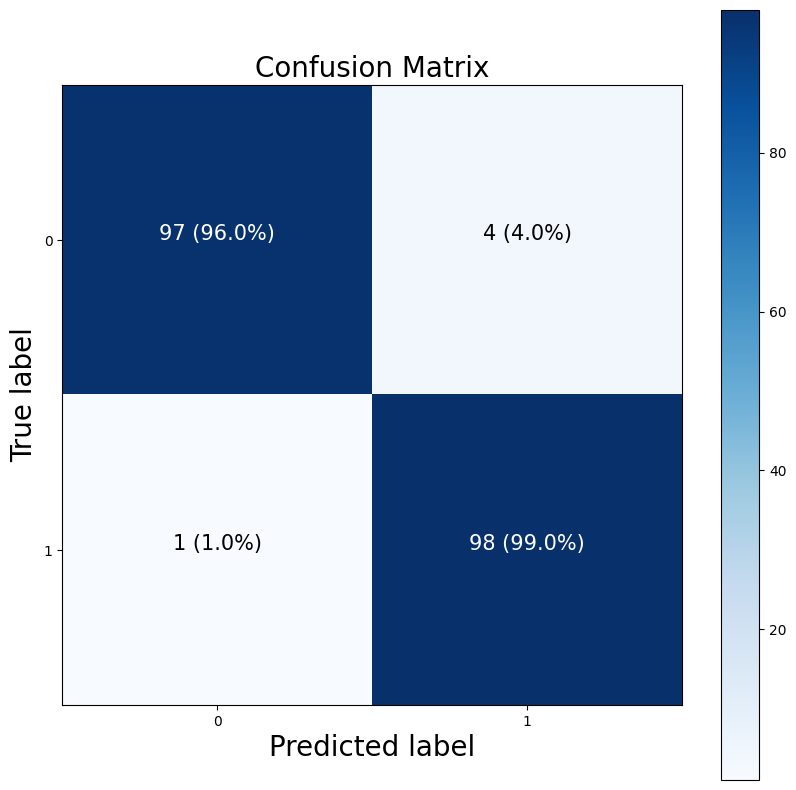

In [ ]:
import itertools

figsize = (10, 10)

cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
n_classes = cm.shape[0]

fig, ax = plt.subplots(figsize=figsize)
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

classes = False

if classes:
  labels= classes
else:
  labels = np.arange(cm.shape[0])

ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

###Larger example (Multiclass classification)

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
print(f"Training sample: \n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample: 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

In [ ]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

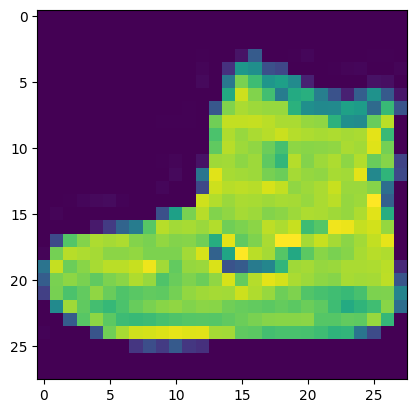

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_data[0]);

In [ ]:
train_labels[0]

9

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
len(class_names)


10

Text(0.5, 1.0, 'T-shirt/top')

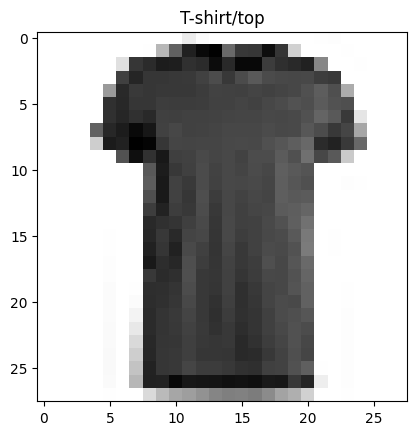

In [ ]:
index_of_choice = 17
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

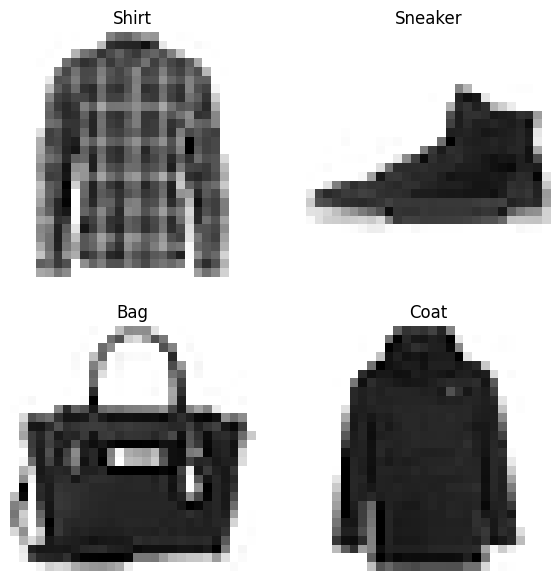

In [ ]:
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

##building a multiclass classification model

similar architecture as binary
* input shape = 28 x 28 shape of one image
* output shape = 10 one per class of clothing
* loss function = tf.keras.losses.CategoricalCrossEntropy()
* ouput layer activation = Softmax

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels)) # see how the model performs on the test set during training


Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.4916 - accuracy: 0.0977 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0989 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3027 - accuracy: 0.1002 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy:

In [ ]:
model_11.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_25 (Dense)            (None, 4)                 3140      
                                                                 
 dense_26 (Dense)            (None, 4)                 20        
                                                                 
 dense_27 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
train_data.min(), train_data.max()

(0, 255)

Neural networks prefer data to be scaled( or normalized) they like numbers in between 0 and 1

In [ ]:
#divide by maximum to get value in between 0 and 1
train_data_norm = train_data /255.0
test_data_norm = test_data / 255.0

train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [ ]:
#data is normalized find a model
# Set random seed
tf.random.set_seed(42)

# Create the model
model_12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
norm_history = model_12.fit(train_data_norm,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data_norm, test_labels)) # see how the model performs on the test set during training


Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 1.0563 - accuracy: 0.6145 - val_loss: 0.7468 - val_accuracy: 0.7309
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6942 - accuracy: 0.7472 - val_loss: 0.6911 - val_accuracy: 0.7433
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6454 - accuracy: 0.7667 - val_loss: 0.6466 - val_accuracy: 0.7706
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6185 - accuracy: 0.7781 - val_loss: 0.6298 - val_accuracy: 0.7794
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5978 - accuracy: 0.7885 - val_loss: 0.6178 - val_accuracy: 0.7840
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5835 - accuracy: 0.7960 - val_loss: 0.6168 - val_accuracy: 0.7870
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5741 - accuracy: 0.7990 - val_loss: 0.6292 - val_accuracy:

<Axes: title={'center': 'Normalized Data'}>

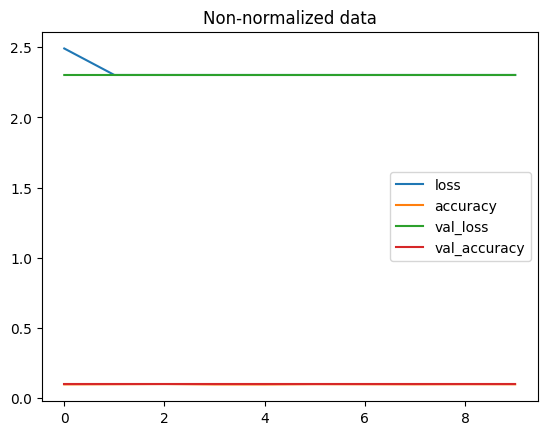

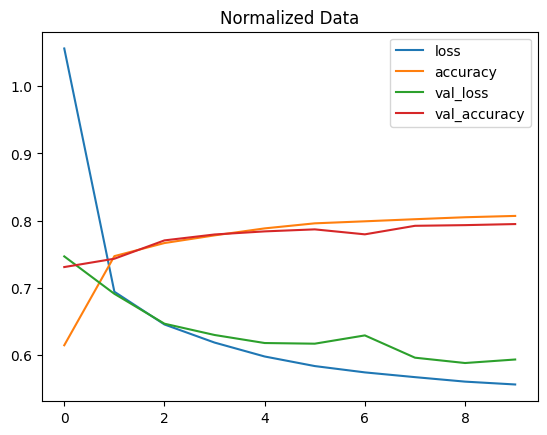

In [ ]:
import pandas as pd
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized data")
pd.DataFrame(norm_history.history).plot(title="Normalized Data")

###Finding ideal learning rate

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_13 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data,
                               train_labels,
                               epochs=40, # model already doing pretty good with current LR, probably don't need 100 epochs
                               validation_data=(test_data, test_labels),
                               callbacks=[lr_scheduler])


Epoch 1/40
1875/1875 [==============================] - 6s 3ms/step - loss: 2.8415 - accuracy: 0.0987 - val_loss: 2.3031 - val_accuracy: 0.1000 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3037 - accuracy: 0.0993 - val_loss: 2.3031 - val_accuracy: 0.1000 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0997 - val_loss: 2.3031 - val_accuracy: 0.1000 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0976 - val_loss: 2.3031 - val_accuracy: 0.1000 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0985 - val_loss: 2.3030 - val_accuracy: 0.1000 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3029 - accuracy: 0.1000 - val_loss: 2.3032 - val_accuracy: 0.1000 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

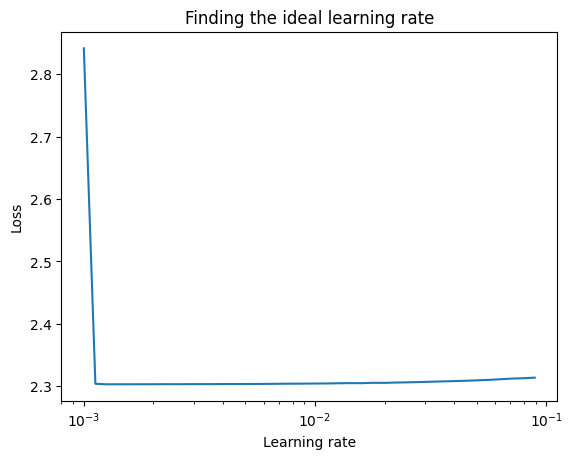

In [ ]:

# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");


In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_14 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # ideal learning rate (same as default)
                 metrics=["accuracy"])

# Fit the model
history_14 = model_14.fit(train_data_norm,
                       train_labels,
                       epochs=20,
                       validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 1.3743 - accuracy: 0.4798 - val_loss: 1.1005 - val_accuracy: 0.6010
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0194 - accuracy: 0.6327 - val_loss: 1.0028 - val_accuracy: 0.6432
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.9238 - accuracy: 0.6708 - val_loss: 0.9144 - val_accuracy: 0.6872
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8801 - accuracy: 0.6895 - val_loss: 0.8837 - val_accuracy: 0.6963
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8430 - accuracy: 0.7091 - val_loss: 0.8600 - val_accuracy: 0.7105
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8122 - accuracy: 0.7204 - val_loss: 0.8233 - val_accuracy: 0.7184
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7842 - accuracy: 0.7293 - val_loss: 0.8040 - val_accuracy:

###Evaluating our multi-class classification model

* evaluate its performance using other classification metrics
* assess some of the predictions
* improve its result
* save and export

In [ ]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)


In [ ]:
y_probs = model_14.predict(test_data_norm)
y_probs[:5]

313/313 [==============================] - 0s 1ms/step


array([[2.7536046e-08, 3.6496646e-09, 1.3318477e-07, 1.3419062e-10,
        5.0322851e-10, 3.8348183e-01, 2.9847538e-08, 1.6454928e-01,
        1.8724406e-03, 4.5009622e-01],
       [4.8809859e-04, 3.3275415e-07, 9.1003567e-01, 6.2412948e-07,
        3.2512099e-02, 1.6505188e-05, 5.6946699e-02, 9.9112454e-11,
        6.6075123e-12, 2.9043921e-23],
       [2.3824324e-13, 9.9849713e-01, 3.8150077e-07, 3.8418525e-06,
        1.4301698e-03, 3.2425029e-10, 7.2626790e-08, 6.8372690e-05,
        4.6855102e-22, 9.6054516e-17],
       [7.1762643e-16, 9.9969494e-01, 2.0894445e-08, 1.4623481e-07,
        2.8255602e-04, 5.0590435e-12, 1.9366921e-09, 2.2383412e-05,
        5.8402442e-26, 3.5853815e-19],
       [3.2811258e-02, 8.8883494e-04, 3.0720425e-01, 2.1127751e-02,
        2.2496958e-01, 3.8093626e-03, 4.0918007e-01, 4.1383378e-06,
        4.6048167e-06, 7.7004375e-12]], dtype=float32)

In [ ]:
test_data[:10], test_data_norm[:10]

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

In [ ]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([2.7536046e-08, 3.6496646e-09, 1.3318477e-07, 1.3419062e-10,
        5.0322851e-10, 3.8348183e-01, 2.9847538e-08, 1.6454928e-01,
        1.8724406e-03, 4.5009622e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [ ]:
y_preds = y_probs.argmax(axis=1)
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_labels, y_preds)

array([[719,   0,  20, 139,  13,   6,  91,   0,  12,   0],
       [  3, 947,   1,  26,  22,   0,   0,   0,   1,   0],
       [ 40,   4, 533,  25, 286,   2, 105,   0,   5,   0],
       [ 33,  38,   4, 841,  41,   2,  36,   0,   5,   0],
       [  5,  48,  92,  61, 749,   2,  43,   0,   0,   0],
       [  2,   0,   0,   0,   0, 888,   0,  62,  18,  30],
       [206,   4, 144, 132, 226,   3, 272,   0,  13,   0],
       [  0,   0,   0,   0,   0,  69,   0, 881,   1,  49],
       [ 25,   2,   1,  32,   4,  70,   9,   6, 833,  18],
       [  1,   0,   0,   0,   0,  28,   0,  59,   7, 905]])

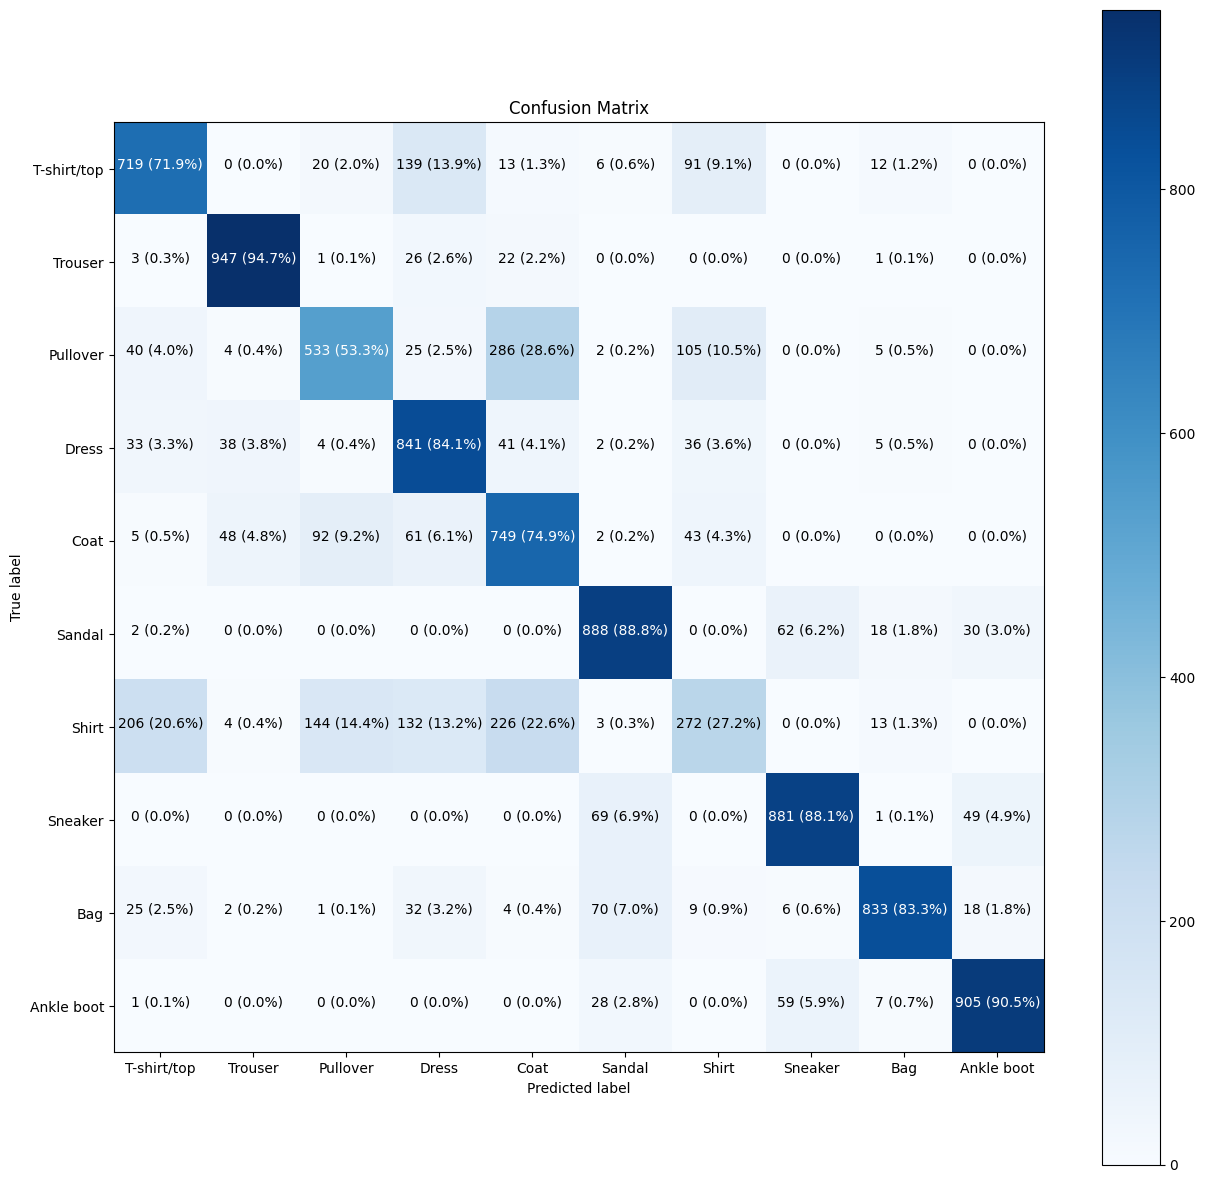

In [ ]:
make_confusion_matrix(test_labels, y_preds, class_names, figsize=(15, 15), text_size=10)

In [ ]:

import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.

  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """
  # Setup random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

1/1 [==============================] - 0s 20ms/step


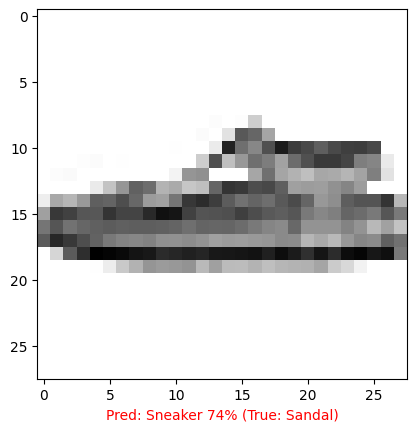

In [ ]:
# Check out a random image as well as its prediction
plot_random_image(model=model_14,
                  images=test_data_norm,
                  true_labels=test_labels,
                  classes=class_names)

###What patterns is our model learning?


In [ ]:
model_14.layers[1]

In [ ]:
Weights, biases = model_14.layers[1].get_weights()
Weights, Weights.shape

(array([[ 0.38409775, -0.45970312, -0.08006272, -0.48010716],
        [-0.00838852, -0.51690584,  0.07935163, -0.04066532],
        [ 0.30598992, -1.5272049 , -0.08583436,  0.7175931 ],
        ...,
        [-0.85098207, -0.22394031,  0.00890514,  0.27916643],
        [-0.9138389 ,  0.20869125, -0.05689953,  0.35805127],
        [-0.18156528, -0.6934068 ,  0.02802126, -0.2432683 ]],
       dtype=float32),
 (784, 4))

In [ ]:
model_14.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_34 (Dense)            (None, 4)                 3140      
                                                                 
 dense_35 (Dense)            (None, 4)                 20        
                                                                 
 dense_36 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


check out bias vector

In [ ]:
biases, biases.shape

(array([-0.34901175,  1.8859935 , -0.02621586,  0.2015243 ], dtype=float32),
 (4,))

every neuron has bias vector.
each of these is paired with weights matrix.
the bias vector gets initialized as 0.
the bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.

In [ ]:
model_14.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_34 (Dense)            (None, 4)                 3140      
                                                                 
 dense_35 (Dense)            (None, 4)                 20        
                                                                 
 dense_36 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


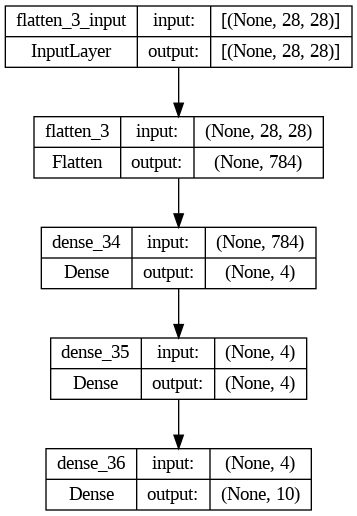

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model_14, show_shapes=True)